In [ ]:
"""
Intelligent Dynamic Backlash Agent: A Trading
Strategy Based on the Directional Change Framework
"""

In [ ]:
import pandas as pd 
from datetime import datetime, timedelta 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# Nos traemos toda el historico de EUR/NZD en barras de 1 min 
df1 = pd.read_csv('../data/DAT_ASCII_EURNZD_M1_2021.csv', header=None,names=['Datetime','Open','High','Low','Close','Volume'], delimiter=';')
df2 = pd.read_csv('../data/DAT_ASCII_EURNZD_M1_2022.csv', header=None,names=['Datetime','Open','High','Low','Close','Volume'], delimiter=';')
df3 = pd.read_csv('../data/DAT_ASCII_EURNZD_M1_2023.csv', header=None,names=['Datetime','Open','High','Low','Close','Volume'], delimiter=';') 

df = df1.copy()
#df = pd.concat([df1,df2,df3])
df.set_index('Datetime', inplace=True)


In [ ]:
#Definimos el metodo que nos indicara los DC

def generate_dc(data, d=0.1):
    """Generates directional change events from time series.

    Based on:
        M. Aloud, E. Tsang, R. B. Olsen, and A. Dupuis, "A Directional-Change Events Approach for Studying Financial Time Series," 2012.

    Args:
        data: pandas.Series or array of floats
        d: Directional Change threshold

    Returns:
        A pandas series of Directional Change Events.

    """
    p = pd.DataFrame({
        "Price": data
    })
    p["Event"] = ''
    event = 'upturn'
    current_state = 'Long_DC'
    ph = p['Price'].iloc[0] # highest price
    pl = ph # lowest price
    ph_index = 0
    pl_index = 0

    for i in range(0, len(p)):

        if event == 'upturn':
            #Continuo haciendo maximos?
            if p['Price'].iloc[i] >= ph:
              #Ahora el precio maximo es el precio actual
              ph = p['Price'].iloc[i]
              ph_index=i
              #Entonces ya he entrado en la parte de OS
              current_state = 'Long_OS'
            #En caso contrario, ha habido un descenso mayor que el threshold desde el punto mas alto?
            if ph/p['Price'].iloc[i] >= (1+d):
              #En ese caso hemos comenzado una tendencia bajista
              event = 'downturn'
              pl = p['Price'].iloc[i]
              pl_index = p['Price'].iloc[i]
              #Definimos confirmacion de DC
              p.at[p.index[i], 'Event'] = 'Short DC Confirmed'
              #Definimos inicio de DC
              if current_state == 'Long_DC':
                p.at[p.index[ph_index], 'Event'] = 'Pivot Point'
              if current_state == 'Long_OS':
                p.at[p.index[ph_index], 'Event'] = 'Pivot Point'
                current_state = 'Short_DC'

        if event == 'downturn':
            #Continuo haciendo minimos?
            if p['Price'].iloc[i] <= pl:
              #Marco el precio actual como nuevo minimo
              pl = p['Price'].iloc[i]
              pl_index=i
              #Entonces ya he entrado en la parte de OS
              current_state = 'Short_OS'
            #En caso contrario, ha habido un incremento mayor que el threshold desde el punto mas bajo?
            if p['Price'].iloc[i]/pl >= (1+d):
              #En ese caso hemos comenzado una tendencia alcista
              event = 'upturn'
              ph = p['Price'].iloc[i]
              ph_index = i
              #Definimos confirmacion de DC
              p.at[p.index[i], 'Event'] = 'Long DC Confirmed'
              #Definimos inicio de DC
              if current_state == 'Short_DC':
                p.at[p.index[pl_index], 'Event'] = 'Pivot Point'
              if current_state == 'Short_OS':
                p.at[p.index[pl_index], 'Event'] = 'Pivot Point'
                current_state = 'Long_DC'


    return p['Event']

In [ ]:
df['Stheta_01']= generate_dc(df['Close'],0.01)

In [ ]:
df['Close'].plot()

KeyboardInterrupt: 

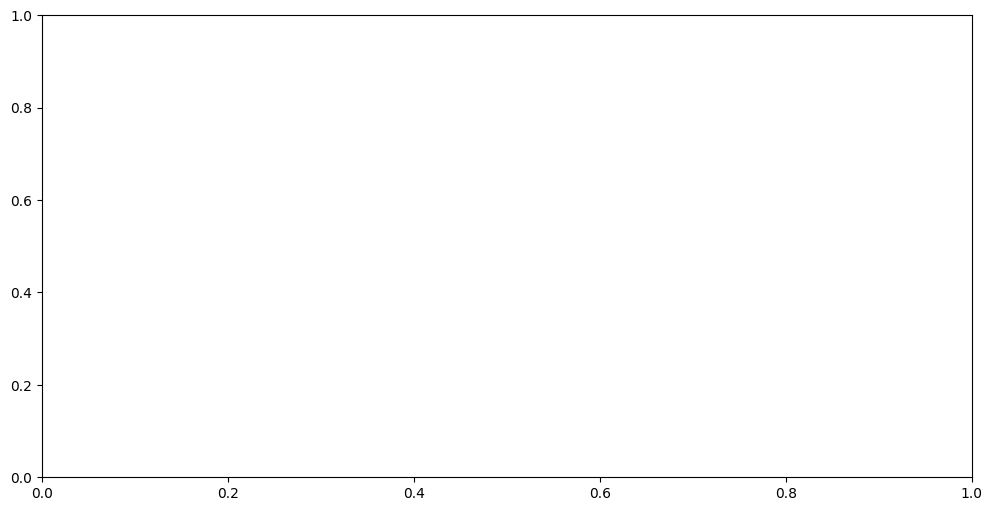

In [11]:
# Suponiendo que ya tienes tu DataFrame llamado df

# Filtrar las posiciones donde df['Stheta'] es igual a 'Pivot Point'
pivot_indices = df[df['Stheta_01'] == 'Pivot Point'].index

# Crear el plot de df['Close']
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close')

# Añadir líneas verticales en las posiciones filtradas
#plt.vlines(pivot_indices, ymin=df['Close'].min(), ymax=df['Close'].max(), color='red', linestyle='--', alpha=0.7)

# Añadir títulos y leyendas
plt.title('EUR/NZD Close Prices with Pivot Points')

# Mostrar el gráfico
plt.show(block=False)